<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.201947,38.347944,20.435524,31.850063,-0.000226,129.835252,129.835121,0.000131
1,0.0,1.0,40.126854,48.656878,25.981421,50.755909,-0.000246,175.520814,175.520567,0.000247
2,0.0,2.0,32.109093,29.152322,86.810202,79.033933,0.000019,237.105568,237.106350,-0.000783
3,0.0,3.0,83.765008,84.348776,41.128562,88.505291,-0.000111,307.747527,307.746824,0.000703
4,0.0,4.0,76.467716,92.274741,38.599011,46.448238,-0.000038,263.789667,263.789252,0.000415
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.165100,80.840217,38.515903,79.470867,0.000044,287.992131,287.991851,0.000280
19996,999.0,16.0,27.586575,46.577667,75.428569,33.576878,0.000796,193.170485,193.169968,0.000516
19997,999.0,17.0,95.685470,61.509943,72.404546,93.967727,-0.000312,333.567374,333.567015,0.000359
19998,999.0,18.0,36.885521,35.896400,84.607659,90.087049,0.000234,257.476864,257.477075,-0.000211


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.201947  38.347944  20.435524  31.850063 -0.000226  129.835252   
      1.0    40.126854  48.656878  25.981421  50.755909 -0.000246  175.520814   
      2.0    32.109093  29.152322  86.810202  79.033933  0.000019  237.105568   
      3.0    83.765008  84.348776  41.128562  88.505291 -0.000111  307.747527   
      4.0    76.467716  92.274741  38.599011  46.448238 -0.000038  263.789667   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  0.000044  287.992131   
      16.0   27.586575  46.577667  75.428569  33.576878  0.000796  193.170485   
      17.0   95.685470  61.509943  72.404546  93.967727 -0.000312  333.567374   
      18.0   36.885521  35.896400  84.607659  90.087049  0.000234  257.476864   
      19.0   74.865014  82.653062  75.595391  89.719271  0.000018  332.832756   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    129.835121  0.000131  
      1.0    175.520567  0.000247  
      2.0    237.106350 -0.000783  
      3.0    307.746824  0.000703  
      4.0    263.789252  0.000415  
...                 ...       ...  
999.0 15.0   287.991851  0.000280  
      16.0   193.169968  0.000516  
      17.0   333.567015  0.000359  
      18.0   257.477075 -0.000211  
      19.0   332.832892 -0.000135  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.201947  38.347944  20.435524  31.850063 -0.000226  129.835252   
      1.0    40.126854  48.656878  25.981421  50.755909 -0.000246  175.520814   
      2.0    32.109093  29.152322  86.810202  79.033933  0.000019  237.105568   
      3.0    83.765008  84.348776  41.128562  88.505291 -0.000111  307.747527   
      4.0    76.467716  92.274741  38.599011  46.448238 -0.000038  263.789667   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  0.000044  287.992131   
      16.0   27.586575  46.577667  75.428569  33.576878  0.000796  193.170485   
      17.0   95.685470  61.509943  72.404546  93.967727 -0.000312  333.567374   
      18.0   36.885521  35.896400  84.607659  90.087049  0.000234  257.476864   
      19.0   74.865014  82.653062  75.595391  89.719271  0.000018  332.832756   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    129.835121  0.000131  
      1.0    175.520567  0.000247  
      2.0    237.106350 -0.000783  
      3.0    307.746824  0.000703  
      4.0    263.789252  0.000415  
...                 ...       ...  
999.0 15.0   287.991851  0.000280  
      16.0   193.169968  0.000516  
      17.0   333.567015  0.000359  
      18.0   257.477075 -0.000211  
      19.0   332.832892 -0.000135  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.201947,38.347944,20.435524,31.850063,-0.000226,129.835252,129.835121,0.000131
1,0.0,1.0,40.126854,48.656878,25.981421,50.755909,-0.000246,175.520814,175.520567,0.000247
2,0.0,2.0,32.109093,29.152322,86.810202,79.033933,0.000019,237.105568,237.106350,-0.000783
3,0.0,3.0,83.765008,84.348776,41.128562,88.505291,-0.000111,307.747527,307.746824,0.000703
4,0.0,4.0,76.467716,92.274741,38.599011,46.448238,-0.000038,263.789667,263.789252,0.000415
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.165100,80.840217,38.515903,79.470867,0.000044,287.992131,287.991851,0.000280
19996,999.0,16.0,27.586575,46.577667,75.428569,33.576878,0.000796,193.170485,193.169968,0.000516
19997,999.0,17.0,95.685470,61.509943,72.404546,93.967727,-0.000312,333.567374,333.567015,0.000359
19998,999.0,18.0,36.885521,35.896400,84.607659,90.087049,0.000234,257.476864,257.477075,-0.000211


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.201947  38.347944  20.435524  31.850063 -0.000226  129.835252   
      1.0    40.126854  48.656878  25.981421  50.755909 -0.000246  175.520814   
      2.0    32.109093  29.152322  86.810202  79.033933  0.000019  237.105568   
      3.0    83.765008  84.348776  41.128562  88.505291 -0.000111  307.747527   
      4.0    76.467716  92.274741  38.599011  46.448238 -0.000038  263.789667   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  0.000044  287.992131   
      16.0   27.586575  46.577667  75.428569  33.576878  0.000796  193.170485   
      17.0   95.685470  61.509943  72.404546  93.967727 -0.000312  333.567374   
      18.0   36.885521  35.896400  84.607659  90.087049  0.000234  257.476864   
      19.0   74.865014  82.653062  75.595391  89.719271  0.000018  332.832756   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    129.835121  0.000131  
      1.0    175.520567  0.000247  
      2.0    237.106350 -0.000783  
      3.0    307.746824  0.000703  
      4.0    263.789252  0.000415  
...                 ...       ...  
999.0 15.0   287.991851  0.000280  
      16.0   193.169968  0.000516  
      17.0   333.567015  0.000359  
      18.0   257.477075 -0.000211  
      19.0   332.832892 -0.000135  

[20000 rows x 8 columns]

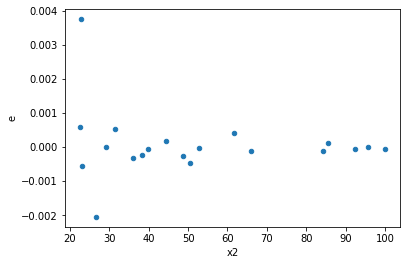

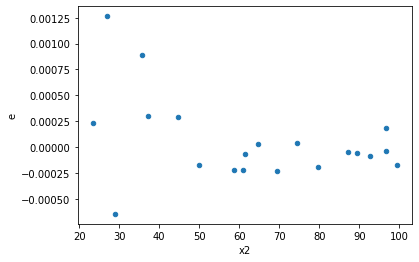

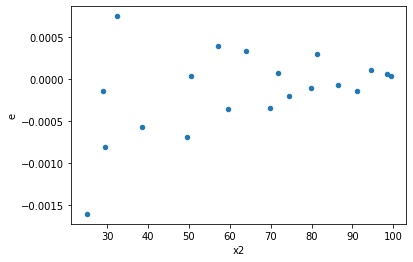

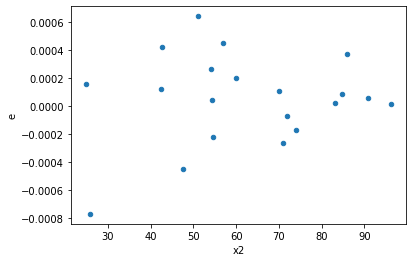

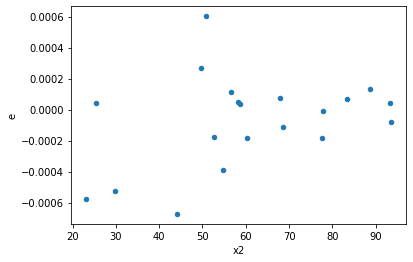

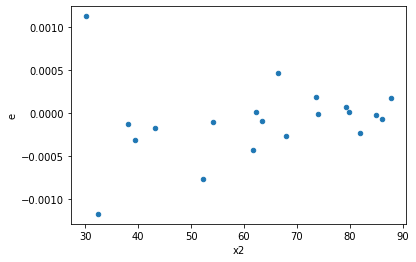

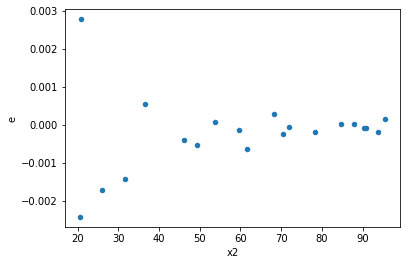

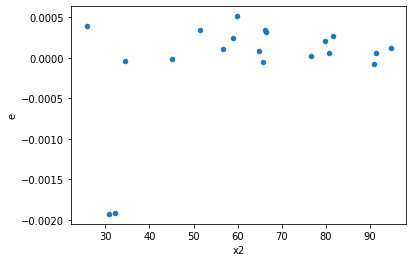

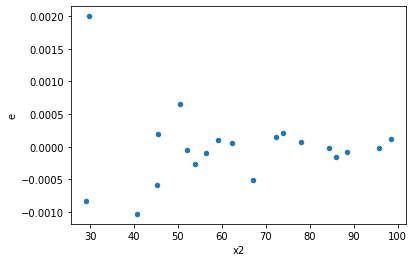

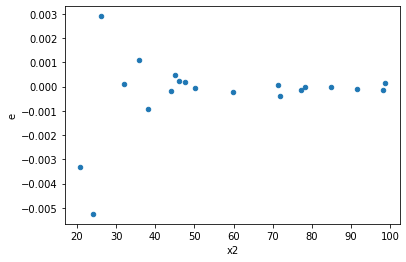

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,2.227831116120668e-07,5.655002507553278e-06,3.713051860201113e-08,9.425004179255462e-07,25.383443415586896,0.0010280430426958809,0.9994859784786521,0.0005140215213479404,Reject001=0 : Heteroscedasticity
1.0,3.0,9.0,1.933643504276286e-08,1.9828243496815397e-06,6.44547834758762e-09,2.2031381663128219e-07,34.18114292692335,6.019541499857617e-05,0.9999699022925007,3.0097707499288084e-05,Reject001=0 : Heteroscedasticity
4.0,8.0,4.0,1.1389498601146932e-07,4.890811369487012e-07,1.4236873251433665e-08,1.222702842371753e-07,8.58828213736205,0.05414501158028129,0.9729274942098594,0.027072505790140644,Reject001=1 : Homoscedasticity
5.0,7.0,5.0,8.0053550631225e-07,8.744392358405618e-07,1.1436221518746427e-07,1.7488784716811235e-07,1.5292450122746708,0.6615606882158751,0.6692196558920624,0.33078034410793755,Reject001=1 : Homoscedasticity
8.0,4.0,8.0,7.302911937676877e-07,2.144479019433584e-06,1.8257279844192193e-07,2.68059877429198e-07,1.4682355735182002,0.5956740456385969,0.7021629771807015,0.29783702281929847,Reject001=1 : Homoscedasticity
14.0,3.0,9.0,4.315215028178303e-07,1.0622126307311762e-05,1.4384050093927678e-07,1.1802362563679735e-06,8.205173429326543,0.012151772462328347,0.9939241137688358,0.006075886231164174,Reject001=1 : Homoscedasticity
15.0,8.0,4.0,2.1238892294433971e-07,4.884913184581088e-06,2.6548615368042464e-08,1.221228296145272e-06,45.99969825979358,0.002263105840793145,0.9988684470796034,0.0011315529203965724,Reject001=0 : Heteroscedasticity
18.0,9.0,3.0,4.3374931834160155e-07,1.8334648956166263e-07,4.8194368704622396e-08,6.111549652055421e-08,1.2681045143494645,0.9399312135770042,0.5300343932114979,0.4699656067885021,Reject001=1 : Homoscedasticity
20.0,6.0,6.0,4.3305391120150536e-07,6.421951093426153e-07,7.217565186691756e-08,1.0703251822376922e-07,1.4829449468793596,0.6443970993380748,0.6778014503309626,0.3221985496690374,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,2.227831116120668e-07,5.655002507553278e-06,3.713051860201113e-08,9.425004179255462e-07,25.383443415586896,0.0010280430426958809,Reject001=0 : Heteroscedasticity
1.0,3.0,9.0,1.933643504276286e-08,1.9828243496815397e-06,6.44547834758762e-09,2.2031381663128219e-07,34.18114292692335,6.019541499857617e-05,Reject001=0 : Heteroscedasticity
2.0,7.0,5.0,1.7674250059327503e-06,6.057911968870933e-07,2.5248928656182145e-07,1.2115823937741866e-07,0.47985497138213556,0.36535029136993596,Reject001=1 : Homoscedasticity
3.0,5.0,7.0,7.059433531311532e-07,3.519500403409599e-07,1.4118867062623065e-07,5.0278577191565697e-08,0.35610914791221726,0.27342235871343673,Reject001=1 : Homoscedasticity
4.0,8.0,4.0,1.1389498601146932e-07,4.890811369487012e-07,1.4236873251433665e-08,1.222702842371753e-07,8.58828213736205,0.05414501158028129,Reject001=1 : Homoscedasticity
5.0,7.0,5.0,8.0053550631225e-07,8.744392358405618e-07,1.1436221518746427e-07,1.7488784716811235e-07,1.5292450122746708,0.6615606882158751,Reject001=1 : Homoscedasticity
6.0,5.0,7.0,6.856637869339976e-06,4.827813031653701e-07,1.3713275738679952e-06,6.896875759505287e-08,0.05029342289130682,0.004571001909020842,Reject001=0 : Heteroscedasticity
7.0,3.0,9.0,5.400255066896102e-08,1.320703114795972e-07,1.8000850222987007e-08,1.4674479053288578e-08,0.8152103301514799,0.9657260903911898,Reject001=1 : Homoscedasticity
8.0,4.0,8.0,7.302911937676877e-07,2.144479019433584e-06,1.8257279844192193e-07,2.68059877429198e-07,1.4682355735182002,0.5956740456385969,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      612
Reject001=0 : Heteroscedasticity    388
Name: Result_test, dtype: int64